In [13]:
from simplex import Simplex_CLASS
import torch
import random
import cv2
import matplotlib.pyplot as plt

In [14]:
def generate_simplex_noise(
        Simplex_instance, x, t, random_param=False, octave=3, persistence=0.8, frequency=128,
        in_channels=4
        ):
    noise = torch.empty(x.shape).to(x.device)
#     print("x", x.shape)
#     print("noise", noise.shape)
    for i in range(in_channels):
        Simplex_instance.newSeed()
        if random_param:
            param = random.choice(
                    [(2, 0.6, 16), (6, 0.6, 32), (7, 0.7, 32), (10, 0.8, 64), (5, 0.8, 16), (4, 0.6, 16), (1, 0.6, 64),
                     (7, 0.8, 128), (6, 0.9, 64), (2, 0.85, 128), (2, 0.85, 64), (2, 0.85, 32), (2, 0.85, 16),
                     (2, 0.85, 8),
                     (2, 0.85, 4), (2, 0.85, 2), (1, 0.85, 128), (1, 0.85, 64), (1, 0.85, 32), (1, 0.85, 16),
                     (1, 0.85, 8),
                     (1, 0.85, 4), (1, 0.85, 2), ]
                    )
            # 2D octaves seem to introduce directional artifacts in the top left
            noise[:, i, ...] = torch.unsqueeze(
                    torch.from_numpy(
                            # Simplex_instance.rand_2d_octaves(
                            #         x.shape[-2:], param[0], param[1],
                            #         param[2]
                            #         )
                            Simplex_instance.rand_3d_fixed_T_octaves(
                                    x.shape[-2:], t.detach().cpu().numpy(), param[0], param[1],
                                    param[2]
                                    )
                            ).to(x.device), 0
                    ).repeat(x.shape[0], 1, 1, 1)
#         print(f"i and in_channels {i} / {in_channels}")
#         print("noise shape", noise.shape)
#         print("t shape", t.shape)
        noise[:, i, ...] = torch.unsqueeze(
                torch.from_numpy(
                        # Simplex_instance.rand_2d_octaves(
                        #         x.shape[-2:], octave,
                        #         persistence, frequency
                        #         )
                        Simplex_instance.rand_3d_fixed_T_octaves(
                                x.shape[-2:], t.detach().cpu().numpy(), octave,
                                persistence, frequency
                                )
                        ).to(x.device), 0
                ).repeat(x.shape[0], 1, 1, 1)
    return noise

In [15]:
simplex = Simplex_CLASS()

In [16]:
img_channels = 3
num_timesteps = 200

In [149]:
noise_fn = lambda x, t: generate_simplex_noise(simplex, x, t, False, in_channels=img_channels)

In [150]:
path = r"C:\Users\Admin\Dropbox\PC\Downloads\1-100.jpg"

In [151]:
image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

In [152]:
image = image.astype(dtype = 'int32')

In [153]:
type(image)

numpy.ndarray

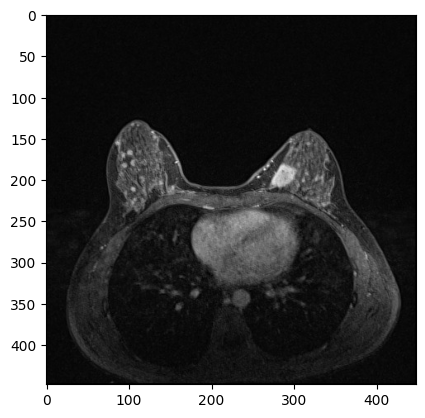

In [154]:
plt.imshow(image)

In [155]:
x = torch.from_numpy(image)

In [156]:
# x.shape

In [157]:
x = x.reshape(1, 3, 448, 448)

In [158]:
# x = torch.rand(1, 4, 224, 224)

In [159]:
t = torch.randint(0, num_timesteps, (x.shape[0],), device= 'cuda')

In [160]:
t = torch.Tensor([0])

In [161]:
noise = noise_fn(x, t)

In [164]:
noise.var()

tensor(0.2125)

In [163]:
noise.mean()

tensor(0.0792)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


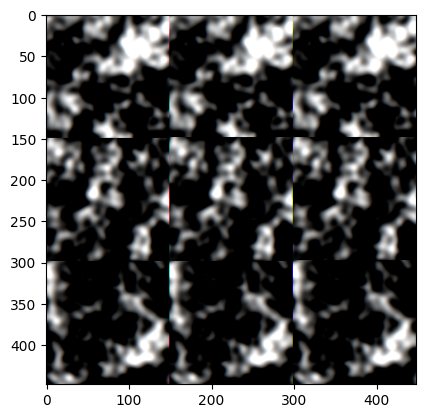

In [162]:
plt.imshow(noise[0].reshape(448, 448, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


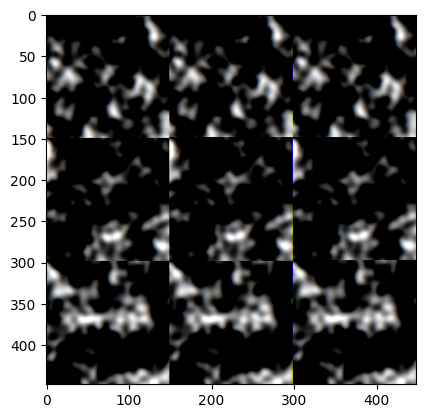

In [97]:
plt.imshow(noise[0].reshape(448, 448, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


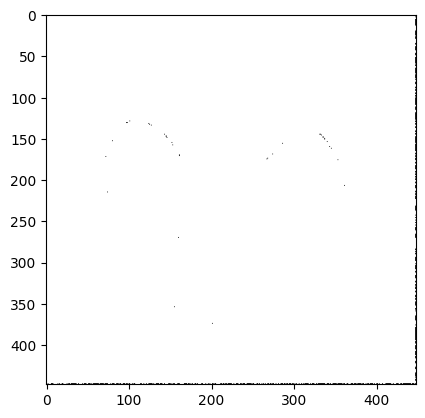

In [165]:
x = x.float()
plt.imshow(x[0].reshape(448, 448, 3))

In [166]:
noise_fn = lambda x, t: torch.randn_like(x) 

In [167]:
noise = noise_fn(x, t)

In [168]:
x.mean()

tensor(26.3033)

In [170]:
noise.var()

tensor(1.0003)

In [169]:
noise.mean()

tensor(0.0005)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


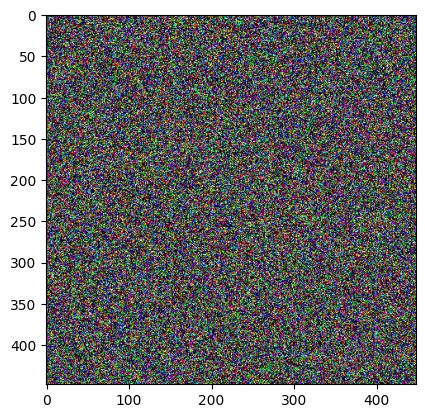

In [136]:
plt.imshow(noise[0].reshape(448, 448, 3))

In [137]:
x = torch.rand(1, 3, 448, 448)

In [127]:
noise = noise_fn(x, t)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


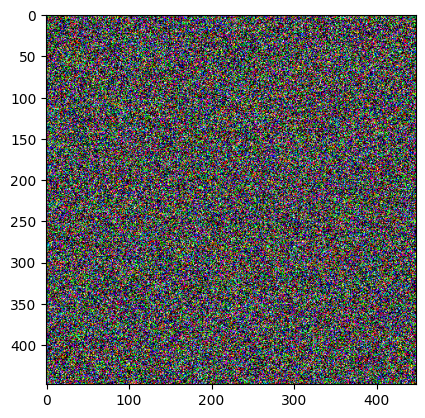

In [128]:
plt.imshow(noise[0].reshape(448, 448, 3))

In [179]:
shape = (256, 256)

In [187]:
b, a = [np.arange(0, end) for end in shape]

In [181]:
Simpclass = Simplex_CLASS()

In [182]:
Simpclass._perm

array([  1,  14,  21, 182,  32,  51,   9, 149,  61, 115, 226,  15,  84,
       212, 130,  33,  11, 234,  91,  27,  35,  68, 101, 220, 172, 153,
        17, 246, 100, 229,  89, 224,  19,  55,  23,  57,  29, 184, 112,
       198,  49, 163, 155,  73, 119,  53,  28,  63, 204,  79,  25, 136,
        37,  81,  39,  67,  58, 108,   5, 175, 124, 215, 201, 242, 238,
         8,  31,  71, 193,  85,  62, 244, 105, 217,  87, 247,   3, 111,
        65, 109, 125, 156, 137, 139,  56, 241, 121, 177, 162,  80, 164,
       197, 200, 104,  59,  99,  83, 254, 188, 103, 113,  82, 249, 248,
       140,  42, 235, 178, 179, 161, 230, 236, 132,  44, 159, 240, 138,
       145, 160, 191, 251, 147, 141,   2,  95, 243, 152, 167, 168, 253,
       232, 180, 252, 151,  88,  54,  97, 171,   7, 255,  24, 114, 133,
         6, 196, 148,  93, 219,  16, 208, 183, 199, 214, 210, 165,  74,
         4,  36, 194, 118, 192, 245, 106, 181, 131,  34, 195, 223,  40,
       166, 169, 205,  76, 203, 218, 207,  20, 185, 129, 187,  9

In [183]:
Simpclass._perm_grad_index3

array([ 3, 42, 63, 42, 24,  9, 27, 15, 39, 57, 30, 45, 36, 60, 30, 27, 33,
       54, 57,  9, 33, 60, 15, 12, 12, 27, 51, 18, 12, 39, 51, 24, 57, 21,
       69, 27, 15, 48, 48, 18,  3, 57, 33,  3, 69, 15, 12, 45, 36, 21,  3,
       48, 39, 27, 45, 57, 30, 36, 15, 21, 12, 69, 27,  6, 66, 24, 21, 69,
        3, 39, 42, 12, 27,  3, 45, 21,  9, 45, 51, 39, 15, 36, 51, 57, 24,
        3,  3, 27, 54, 24, 60, 15, 24, 24, 33,  9, 33, 42, 60, 21, 51, 30,
       27, 24, 60, 54, 57, 30, 33, 51, 42, 60, 36, 60, 45,  0, 54,  3, 48,
       69, 33,  9, 63,  6, 69,  9, 24, 69,  0, 39, 48, 36, 36, 21, 48, 18,
        3,  9, 21, 45,  0, 54, 39, 18, 12, 12, 63,  9, 48, 48, 45, 21, 66,
       54, 63,  6, 12, 36,  6, 66,  0, 15, 30, 39, 33, 30,  9, 21, 48, 66,
        3, 39, 12, 33,  6, 45, 60, 51, 27, 57, 54, 18, 36, 18, 48, 60, 63,
       42, 51,  0, 63, 69, 57,  6, 30, 30, 66, 63, 69, 66, 66, 27,  9, 33,
       63,  6, 51, 45,  0, 12,  0,  6, 33, 15, 30, 42, 15,  0, 66,  6, 69,
       54, 51, 66, 63, 24

In [184]:
STRETCH_CONSTANT3

-0.16666666666666666

In [191]:
t.detach().cpu().numpy()

array([0.], dtype=float32)

In [196]:
x = a[10]
y = b[10]
z = t.detach().cpu().numpy()

In [197]:
# Place input coordinates on simplectic honeycomb.
stretch_offset = (x + y + z) * STRETCH_CONSTANT3
xs = x + stretch_offset
ys = y + stretch_offset
zs = z + stretch_offset

# Floor to get simplectic honeycomb coordinates of rhombohedron (stretched cube) super-cell origin.
xsb = floor(xs)
ysb = floor(ys)
zsb = floor(zs)

# Skew out to get actual coordinates of rhombohedron origin. We'll need these later.
squish_offset = (xsb + ysb + zsb) * SQUISH_CONSTANT3
xb = xsb + squish_offset
yb = ysb + squish_offset
zb = zsb + squish_offset

# Compute simplectic honeycomb coordinates relative to rhombohedral origin.
xins = xs - xsb
yins = ys - ysb
zins = zs - zsb

# Sum those together to get a value that determines which region we're in.
in_sum = xins + yins + zins

# Positions relative to origin point.
dx0 = x - xb
dy0 = y - yb
dz0 = z - zb

value = 0

In [200]:
in_sum

array([1.9999995], dtype=float32)

In [199]:
squish_offset

2.6666666666666665

In [198]:
stretch_offset

array([-3.3333335], dtype=float32)

(100, 256, 256)


MovieWriter ffmpeg unavailable; using Pillow instead.


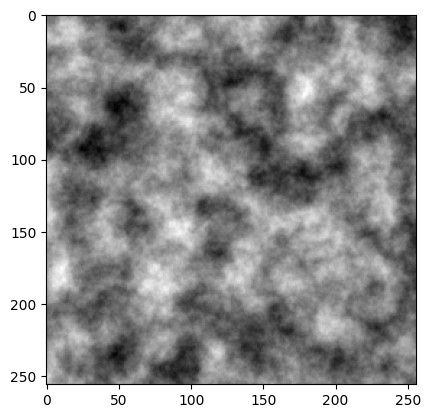

In [172]:
# https://github.com/lmas/opensimplex fork


from ctypes import c_int64
from math import floor

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from numba import njit, prange



class Simplex_CLASS:

    def __init__(self):
        self.newSeed()

    def newSeed(self, seed=None):
        if not seed:
            seed = np.random.randint(-10000000, 10000000)
        self._perm, self._perm_grad_index3 = _init(seed)


    def noise2(self, x, y):
        return _noise2(x, y, self._perm)

    def noise2array(self, x, y):
        return _noise2a(x, y, self._perm)

    def noise3(self, x, y, z):
        return _noise3(x, y, z, self._perm, self._perm_grad_index3)

    def noise3array(self, x, y, z):
        return _noise3a(x, y, z, self._perm, self._perm_grad_index3)

    def rand_3d_octaves(self, shape, octaves=1, persistence=0.5, frequency=32):
        """
            Returns a layered fractal noise in 3D
        :param shape: Shape of 3D tensor output
        :param octaves: Number of levels of fractal noise
        :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
        :param frequency: Frequency of initial octave of noise
        :return: Fractal noise sample with n lots of 2D images
        """
        assert len(shape) == 3
        noise = np.zeros(shape)
        z, y, x = [np.arange(0, end) for end in shape]
        amplitude = 1
        for _ in range(octaves):
            noise += amplitude * self.noise3array(x / frequency, y / frequency, z / frequency)
            frequency /= 2
            amplitude *= persistence
        return noise

    def rand_2d_octaves(self, shape, octaves=1, persistence=0.5, frequency=32):
        """
            Returns a layered fractal noise in 2D
        :param shape: Shape of 2D tensor output
        :param octaves: Number of levels of fractal noise
        :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
        :param frequency: Frequency of initial octave of noise
        :return: Fractal noise sample with n lots of 2D images
        """
        assert len(shape) == 2
        noise = np.zeros(shape)
        y, x = [np.arange(0, end) for end in shape]
        amplitude = 1
        for _ in range(octaves):
            noise += amplitude * self.noise2array(x / frequency, y / frequency)
            frequency /= 2
            amplitude *= persistence
        return noise

    def rand_3d_fixed_T_octaves(self, shape, T, octaves=1, persistence=0.5, frequency=32):
        """
        Returns a layered fractal noise in 3D

        :param shape: Shape of 3D tensor output
        :param octaves: Number of levels of fractal noise
        :param persistence: float between (0-1) -> Rate at which amplitude of each level decreases
        :param frequency: Frequency of initial octave of noise
        :return: Fractal noise sample with n lots of 2D images
        """
        assert len(shape) == 2
        noise = np.zeros((1, *shape))
        y, x = [np.arange(0, end) for end in shape]
        amplitude = 1
        for _ in range(octaves):
            noise += amplitude * self.noise3array(x / frequency, y / frequency, T / frequency)
            frequency /= 2
            amplitude *= persistence
        return noise


# Why 3 (and not just 0 or something)? Well I ran into a bug with
# "overflowing int" errors while refactoring in numpy and using a
# nonzero seed value... This is a reminder
DEFAULT_SEED = 3

# Gradients for 2D. They approximate the directions to the
# vertices of an octagon from the center.
GRADIENTS2 = np.array(
        [
            5, 2, 2, 5,
            -5, 2, -2, 5,
            5, -2, 2, -5,
            -5, -2, -2, -5,
            ], dtype=np.int64
        )

# Gradients for 3D. They approximate the directions to the
# vertices of a rhombicuboctahedron from the center, skewed so
# that the triangular and square facets can be inscribed inside
# circles of the same radius.
GRADIENTS3 = np.array(
        [
            -11, 4, 4, -4, 11, 4, -4, 4, 11,
            11, 4, 4, 4, 11, 4, 4, 4, 11,
            -11, -4, 4, -4, -11, 4, -4, -4, 11,
            11, -4, 4, 4, -11, 4, 4, -4, 11,
            -11, 4, -4, -4, 11, -4, -4, 4, -11,
            11, 4, -4, 4, 11, -4, 4, 4, -11,
            -11, -4, -4, -4, -11, -4, -4, -4, -11,
            11, -4, -4, 4, -11, -4, 4, -4, -11,
            ], dtype=np.int64
        )

# Gradients for 4D. They approximate the directions to the
# vertices of a disprismatotesseractihexadecachoron from the center,
# skewed so that the tetrahedral and cubic facets can be inscribed inside
# spheres of the same radius.
GRADIENTS4 = np.array(
        [
            3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3,
            -3, 1, 1, 1, -1, 3, 1, 1, -1, 1, 3, 1, -1, 1, 1, 3,
            3, -1, 1, 1, 1, -3, 1, 1, 1, -1, 3, 1, 1, -1, 1, 3,
            -3, -1, 1, 1, -1, -3, 1, 1, -1, -1, 3, 1, -1, -1, 1, 3,
            3, 1, -1, 1, 1, 3, -1, 1, 1, 1, -3, 1, 1, 1, -1, 3,
            -3, 1, -1, 1, -1, 3, -1, 1, -1, 1, -3, 1, -1, 1, -1, 3,
            3, -1, -1, 1, 1, -3, -1, 1, 1, -1, -3, 1, 1, -1, -1, 3,
            -3, -1, -1, 1, -1, -3, -1, 1, -1, -1, -3, 1, -1, -1, -1, 3,
            3, 1, 1, -1, 1, 3, 1, -1, 1, 1, 3, -1, 1, 1, 1, -3,
            -3, 1, 1, -1, -1, 3, 1, -1, -1, 1, 3, -1, -1, 1, 1, -3,
            3, -1, 1, -1, 1, -3, 1, -1, 1, -1, 3, -1, 1, -1, 1, -3,
            -3, -1, 1, -1, -1, -3, 1, -1, -1, -1, 3, -1, -1, -1, 1, -3,
            3, 1, -1, -1, 1, 3, -1, -1, 1, 1, -3, -1, 1, 1, -1, -3,
            -3, 1, -1, -1, -1, 3, -1, -1, -1, 1, -3, -1, -1, 1, -1, -3,
            3, -1, -1, -1, 1, -3, -1, -1, 1, -1, -3, -1, 1, -1, -1, -3,
            -3, -1, -1, -1, -1, -3, -1, -1, -1, -1, -3, -1, -1, -1, -1, -3,
            ], dtype=np.int64
        )

STRETCH_CONSTANT2 = -0.211324865405187  # (1/Math.sqrt(2+1)-1)/2
SQUISH_CONSTANT2 = 0.366025403784439  # (Math.sqrt(2+1)-1)/2
STRETCH_CONSTANT3 = -1.0 / 6  # (1/Math.sqrt(3+1)-1)/3
SQUISH_CONSTANT3 = 1.0 / 3  # (Math.sqrt(3+1)-1)/3
STRETCH_CONSTANT4 = -0.138196601125011  # (1/Math.sqrt(4+1)-1)/4
SQUISH_CONSTANT4 = 0.309016994374947  # (Math.sqrt(4+1)-1)/4

NORM_CONSTANT2 = 47
NORM_CONSTANT3 = 103
NORM_CONSTANT4 = 30


def overflow(x):
    # Since normal python ints and longs can be quite humongous we have to use
    # self hack to make them be able to overflow.
    # Using a np.int64 won't work either, as it will still complain with:
    # "OverflowError: int too big to convert"
    return c_int64(x).value


def _init(seed=DEFAULT_SEED):
    # Have to zero fill so we can properly loop over it later
    perm = np.zeros(256, dtype=np.int64)
    perm_grad_index3 = np.zeros(256, dtype=np.int64)
    source = np.arange(256)
    # Generates a proper permutation (i.e. doesn't merely perform N
    # successive pair swaps on a base array)
    seed = overflow(seed * 6364136223846793005 + 1442695040888963407)
    seed = overflow(seed * 6364136223846793005 + 1442695040888963407)
    seed = overflow(seed * 6364136223846793005 + 1442695040888963407)
    for i in range(255, -1, -1):
        seed = overflow(seed * 6364136223846793005 + 1442695040888963407)
        r = int((seed + 31) % (i + 1))
        if r < 0:
            r += i + 1
        perm[i] = source[r]
        perm_grad_index3[i] = int((perm[i] % (len(GRADIENTS3) / 3)) * 3)
        source[r] = source[i]
    return perm, perm_grad_index3


@njit(cache=True)
def _extrapolate2(perm, xsb, ysb, dx, dy):
    index = perm[(perm[xsb & 0xFF] + ysb) & 0xFF] & 0x0E
    g1, g2 = GRADIENTS2[index:index + 2]
    return g1 * dx + g2 * dy


@njit(cache=True)
def _extrapolate3(perm, perm_grad_index3, xsb, ysb, zsb, dx, dy, dz):
    index = perm_grad_index3[
        (perm[(perm[xsb & 0xFF] + ysb) & 0xFF] + zsb) & 0xFF
        ]
    g1, g2, g3 = GRADIENTS3[index:index + 3]
    return g1 * dx + g2 * dy + g3 * dz


@njit(cache=True)
def _noise2(x, y, perm):
    # Place input coordinates onto grid.
    stretch_offset = (x + y) * STRETCH_CONSTANT2
    xs = x + stretch_offset
    ys = y + stretch_offset

    # Floor to get grid coordinates of rhombus (stretched square) super-cell origin.
    xsb = floor(xs)
    ysb = floor(ys)

    # Skew out to get actual coordinates of rhombus origin. We'll need these later.
    squish_offset = (xsb + ysb) * SQUISH_CONSTANT2
    xb = xsb + squish_offset
    yb = ysb + squish_offset

    # Compute grid coordinates relative to rhombus origin.
    xins = xs - xsb
    yins = ys - ysb

    # Sum those together to get a value that determines which region we're in.
    in_sum = xins + yins

    # Positions relative to origin point.
    dx0 = x - xb
    dy0 = y - yb

    value = 0

    # Contribution (1,0)
    dx1 = dx0 - 1 - SQUISH_CONSTANT2
    dy1 = dy0 - 0 - SQUISH_CONSTANT2
    attn1 = 2 - dx1 * dx1 - dy1 * dy1
    if attn1 > 0:
        attn1 *= attn1
        value += attn1 * attn1 * _extrapolate2(perm, xsb + 1, ysb + 0, dx1, dy1)

    # Contribution (0,1)
    dx2 = dx0 - 0 - SQUISH_CONSTANT2
    dy2 = dy0 - 1 - SQUISH_CONSTANT2
    attn2 = 2 - dx2 * dx2 - dy2 * dy2
    if attn2 > 0:
        attn2 *= attn2
        value += attn2 * attn2 * _extrapolate2(perm, xsb + 0, ysb + 1, dx2, dy2)

    if in_sum <= 1:  # We're inside the triangle (2-Simplex) at (0,0)
        zins = 1 - in_sum
        if zins > xins or zins > yins:  # (0,0) is one of the closest two triangular vertices
            if xins > yins:
                xsv_ext = xsb + 1
                ysv_ext = ysb - 1
                dx_ext = dx0 - 1
                dy_ext = dy0 + 1
            else:
                xsv_ext = xsb - 1
                ysv_ext = ysb + 1
                dx_ext = dx0 + 1
                dy_ext = dy0 - 1
        else:  # (1,0) and (0,1) are the closest two vertices.
            xsv_ext = xsb + 1
            ysv_ext = ysb + 1
            dx_ext = dx0 - 1 - 2 * SQUISH_CONSTANT2
            dy_ext = dy0 - 1 - 2 * SQUISH_CONSTANT2
    else:  # We're inside the triangle (2-Simplex) at (1,1)
        zins = 2 - in_sum
        if zins < xins or zins < yins:  # (0,0) is one of the closest two triangular vertices
            if xins > yins:
                xsv_ext = xsb + 2
                ysv_ext = ysb + 0
                dx_ext = dx0 - 2 - 2 * SQUISH_CONSTANT2
                dy_ext = dy0 + 0 - 2 * SQUISH_CONSTANT2
            else:
                xsv_ext = xsb + 0
                ysv_ext = ysb + 2
                dx_ext = dx0 + 0 - 2 * SQUISH_CONSTANT2
                dy_ext = dy0 - 2 - 2 * SQUISH_CONSTANT2
        else:  # (1,0) and (0,1) are the closest two vertices.
            dx_ext = dx0
            dy_ext = dy0
            xsv_ext = xsb
            ysv_ext = ysb
        xsb += 1
        ysb += 1
        dx0 = dx0 - 1 - 2 * SQUISH_CONSTANT2
        dy0 = dy0 - 1 - 2 * SQUISH_CONSTANT2

    # Contribution (0,0) or (1,1)
    attn0 = 2 - dx0 * dx0 - dy0 * dy0
    if attn0 > 0:
        attn0 *= attn0
        value += attn0 * attn0 * _extrapolate2(perm, xsb, ysb, dx0, dy0)

    # Extra Vertex
    attn_ext = 2 - dx_ext * dx_ext - dy_ext * dy_ext
    if attn_ext > 0:
        attn_ext *= attn_ext
        value += attn_ext * attn_ext * _extrapolate2(perm, xsv_ext, ysv_ext, dx_ext, dy_ext)

    return value / NORM_CONSTANT2


@njit(cache=True, parallel=True)
def _noise2a(x, y, perm):
    noise = np.zeros(x.size * y.size, dtype=np.double)
    for i in prange(y.size):
        for j in prange(x.size):
            noise[i * y.size + j] = _noise2(x[j], y[i], perm)
    return noise.reshape((x.size, y.size))


@njit(cache=True)
def _noise3(x, y, z, perm, perm_grad_index3):
    # Place input coordinates on simplectic honeycomb.
    stretch_offset = (x + y + z) * STRETCH_CONSTANT3
    xs = x + stretch_offset
    ys = y + stretch_offset
    zs = z + stretch_offset

    # Floor to get simplectic honeycomb coordinates of rhombohedron (stretched cube) super-cell origin.
    xsb = floor(xs)
    ysb = floor(ys)
    zsb = floor(zs)

    # Skew out to get actual coordinates of rhombohedron origin. We'll need these later.
    squish_offset = (xsb + ysb + zsb) * SQUISH_CONSTANT3
    xb = xsb + squish_offset
    yb = ysb + squish_offset
    zb = zsb + squish_offset

    # Compute simplectic honeycomb coordinates relative to rhombohedral origin.
    xins = xs - xsb
    yins = ys - ysb
    zins = zs - zsb

    # Sum those together to get a value that determines which region we're in.
    in_sum = xins + yins + zins

    # Positions relative to origin point.
    dx0 = x - xb
    dy0 = y - yb
    dz0 = z - zb

    value = 0
    if in_sum <= 1:  # We're inside the tetrahedron (3-Simplex) at (0,0,0)

        # Determine which two of (0,0,1), (0,1,0), (1,0,0) are closest.
        a_point = 0x01
        a_score = xins
        b_point = 0x02
        b_score = yins
        if a_score >= b_score and zins > b_score:
            b_score = zins
            b_point = 0x04
        elif a_score < b_score and zins > a_score:
            a_score = zins
            a_point = 0x04

        # Now we determine the two lattice points not part of the tetrahedron that may contribute.
        # This depends on the closest two tetrahedral vertices, including (0,0,0)
        wins = 1 - in_sum
        if wins > a_score or wins > b_score:  # (0,0,0) is one of the closest two tetrahedral vertices.
            c = b_point if (b_score > a_score) else a_point  # Our other closest vertex is the closest out of a and b.

            if (c & 0x01) == 0:
                xsv_ext0 = xsb - 1
                xsv_ext1 = xsb
                dx_ext0 = dx0 + 1
                dx_ext1 = dx0
            else:
                xsv_ext0 = xsv_ext1 = xsb + 1
                dx_ext0 = dx_ext1 = dx0 - 1

            if (c & 0x02) == 0:
                ysv_ext0 = ysv_ext1 = ysb
                dy_ext0 = dy_ext1 = dy0
                if (c & 0x01) == 0:
                    ysv_ext1 -= 1
                    dy_ext1 += 1
                else:
                    ysv_ext0 -= 1
                    dy_ext0 += 1
            else:
                ysv_ext0 = ysv_ext1 = ysb + 1
                dy_ext0 = dy_ext1 = dy0 - 1

            if (c & 0x04) == 0:
                zsv_ext0 = zsb
                zsv_ext1 = zsb - 1
                dz_ext0 = dz0
                dz_ext1 = dz0 + 1
            else:
                zsv_ext0 = zsv_ext1 = zsb + 1
                dz_ext0 = dz_ext1 = dz0 - 1
        else:  # (0,0,0) is not one of the closest two tetrahedral vertices.
            c = (a_point | b_point)  # Our two extra vertices are determined by the closest two.

            if (c & 0x01) == 0:
                xsv_ext0 = xsb
                xsv_ext1 = xsb - 1
                dx_ext0 = dx0 - 2 * SQUISH_CONSTANT3
                dx_ext1 = dx0 + 1 - SQUISH_CONSTANT3
            else:
                xsv_ext0 = xsv_ext1 = xsb + 1
                dx_ext0 = dx0 - 1 - 2 * SQUISH_CONSTANT3
                dx_ext1 = dx0 - 1 - SQUISH_CONSTANT3

            if (c & 0x02) == 0:
                ysv_ext0 = ysb
                ysv_ext1 = ysb - 1
                dy_ext0 = dy0 - 2 * SQUISH_CONSTANT3
                dy_ext1 = dy0 + 1 - SQUISH_CONSTANT3
            else:
                ysv_ext0 = ysv_ext1 = ysb + 1
                dy_ext0 = dy0 - 1 - 2 * SQUISH_CONSTANT3
                dy_ext1 = dy0 - 1 - SQUISH_CONSTANT3

            if (c & 0x04) == 0:
                zsv_ext0 = zsb
                zsv_ext1 = zsb - 1
                dz_ext0 = dz0 - 2 * SQUISH_CONSTANT3
                dz_ext1 = dz0 + 1 - SQUISH_CONSTANT3
            else:
                zsv_ext0 = zsv_ext1 = zsb + 1
                dz_ext0 = dz0 - 1 - 2 * SQUISH_CONSTANT3
                dz_ext1 = dz0 - 1 - SQUISH_CONSTANT3

        # Contribution (0,0,0)
        attn0 = 2 - dx0 * dx0 - dy0 * dy0 - dz0 * dz0
        if attn0 > 0:
            attn0 *= attn0
            value += attn0 * attn0 * _extrapolate3(perm, perm_grad_index3, xsb + 0, ysb + 0, zsb + 0, dx0, dy0, dz0)

        # Contribution (1,0,0)
        dx1 = dx0 - 1 - SQUISH_CONSTANT3
        dy1 = dy0 - 0 - SQUISH_CONSTANT3
        dz1 = dz0 - 0 - SQUISH_CONSTANT3
        attn1 = 2 - dx1 * dx1 - dy1 * dy1 - dz1 * dz1
        if attn1 > 0:
            attn1 *= attn1
            value += attn1 * attn1 * _extrapolate3(perm, perm_grad_index3, xsb + 1, ysb + 0, zsb + 0, dx1, dy1, dz1)

        # Contribution (0,1,0)
        dx2 = dx0 - 0 - SQUISH_CONSTANT3
        dy2 = dy0 - 1 - SQUISH_CONSTANT3
        dz2 = dz1
        attn2 = 2 - dx2 * dx2 - dy2 * dy2 - dz2 * dz2
        if attn2 > 0:
            attn2 *= attn2
            value += attn2 * attn2 * _extrapolate3(perm, perm_grad_index3, xsb + 0, ysb + 1, zsb + 0, dx2, dy2, dz2)

        # Contribution (0,0,1)
        dx3 = dx2
        dy3 = dy1
        dz3 = dz0 - 1 - SQUISH_CONSTANT3
        attn3 = 2 - dx3 * dx3 - dy3 * dy3 - dz3 * dz3
        if attn3 > 0:
            attn3 *= attn3
            value += attn3 * attn3 * _extrapolate3(perm, perm_grad_index3, xsb + 0, ysb + 0, zsb + 1, dx3, dy3, dz3)
    elif in_sum >= 2:  # We're inside the tetrahedron (3-Simplex) at (1,1,1)

        # Determine which two tetrahedral vertices are the closest, out of (1,1,0), (1,0,1), (0,1,1) but not (1,1,1).
        a_point = 0x06
        a_score = xins
        b_point = 0x05
        b_score = yins
        if a_score <= b_score and zins < b_score:
            b_score = zins
            b_point = 0x03
        elif a_score > b_score and zins < a_score:
            a_score = zins
            a_point = 0x03

        # Now we determine the two lattice points not part of the tetrahedron that may contribute.
        # This depends on the closest two tetrahedral vertices, including (1,1,1)
        wins = 3 - in_sum
        if wins < a_score or wins < b_score:  # (1,1,1) is one of the closest two tetrahedral vertices.
            c = b_point if (b_score < a_score) else a_point  # Our other closest vertex is the closest out of a and b.

            if (c & 0x01) != 0:
                xsv_ext0 = xsb + 2
                xsv_ext1 = xsb + 1
                dx_ext0 = dx0 - 2 - 3 * SQUISH_CONSTANT3
                dx_ext1 = dx0 - 1 - 3 * SQUISH_CONSTANT3
            else:
                xsv_ext0 = xsv_ext1 = xsb
                dx_ext0 = dx_ext1 = dx0 - 3 * SQUISH_CONSTANT3

            if (c & 0x02) != 0:
                ysv_ext0 = ysv_ext1 = ysb + 1
                dy_ext0 = dy_ext1 = dy0 - 1 - 3 * SQUISH_CONSTANT3
                if (c & 0x01) != 0:
                    ysv_ext1 += 1
                    dy_ext1 -= 1
                else:
                    ysv_ext0 += 1
                    dy_ext0 -= 1
            else:
                ysv_ext0 = ysv_ext1 = ysb
                dy_ext0 = dy_ext1 = dy0 - 3 * SQUISH_CONSTANT3

            if (c & 0x04) != 0:
                zsv_ext0 = zsb + 1
                zsv_ext1 = zsb + 2
                dz_ext0 = dz0 - 1 - 3 * SQUISH_CONSTANT3
                dz_ext1 = dz0 - 2 - 3 * SQUISH_CONSTANT3
            else:
                zsv_ext0 = zsv_ext1 = zsb
                dz_ext0 = dz_ext1 = dz0 - 3 * SQUISH_CONSTANT3
        else:  # (1,1,1) is not one of the closest two tetrahedral vertices.
            c = (a_point & b_point)  # Our two extra vertices are determined by the closest two.

            if (c & 0x01) != 0:
                xsv_ext0 = xsb + 1
                xsv_ext1 = xsb + 2
                dx_ext0 = dx0 - 1 - SQUISH_CONSTANT3
                dx_ext1 = dx0 - 2 - 2 * SQUISH_CONSTANT3
            else:
                xsv_ext0 = xsv_ext1 = xsb
                dx_ext0 = dx0 - SQUISH_CONSTANT3
                dx_ext1 = dx0 - 2 * SQUISH_CONSTANT3

            if (c & 0x02) != 0:
                ysv_ext0 = ysb + 1
                ysv_ext1 = ysb + 2
                dy_ext0 = dy0 - 1 - SQUISH_CONSTANT3
                dy_ext1 = dy0 - 2 - 2 * SQUISH_CONSTANT3
            else:
                ysv_ext0 = ysv_ext1 = ysb
                dy_ext0 = dy0 - SQUISH_CONSTANT3
                dy_ext1 = dy0 - 2 * SQUISH_CONSTANT3

            if (c & 0x04) != 0:
                zsv_ext0 = zsb + 1
                zsv_ext1 = zsb + 2
                dz_ext0 = dz0 - 1 - SQUISH_CONSTANT3
                dz_ext1 = dz0 - 2 - 2 * SQUISH_CONSTANT3
            else:
                zsv_ext0 = zsv_ext1 = zsb
                dz_ext0 = dz0 - SQUISH_CONSTANT3
                dz_ext1 = dz0 - 2 * SQUISH_CONSTANT3

        # Contribution (1,1,0)
        dx3 = dx0 - 1 - 2 * SQUISH_CONSTANT3
        dy3 = dy0 - 1 - 2 * SQUISH_CONSTANT3
        dz3 = dz0 - 0 - 2 * SQUISH_CONSTANT3
        attn3 = 2 - dx3 * dx3 - dy3 * dy3 - dz3 * dz3
        if attn3 > 0:
            attn3 *= attn3
            value += attn3 * attn3 * _extrapolate3(perm, perm_grad_index3, xsb + 1, ysb + 1, zsb + 0, dx3, dy3, dz3)

        # Contribution (1,0,1)
        dx2 = dx3
        dy2 = dy0 - 0 - 2 * SQUISH_CONSTANT3
        dz2 = dz0 - 1 - 2 * SQUISH_CONSTANT3
        attn2 = 2 - dx2 * dx2 - dy2 * dy2 - dz2 * dz2
        if attn2 > 0:
            attn2 *= attn2
            value += attn2 * attn2 * _extrapolate3(perm, perm_grad_index3, xsb + 1, ysb + 0, zsb + 1, dx2, dy2, dz2)

        # Contribution (0,1,1)
        dx1 = dx0 - 0 - 2 * SQUISH_CONSTANT3
        dy1 = dy3
        dz1 = dz2
        attn1 = 2 - dx1 * dx1 - dy1 * dy1 - dz1 * dz1
        if attn1 > 0:
            attn1 *= attn1
            value += attn1 * attn1 * _extrapolate3(perm, perm_grad_index3, xsb + 0, ysb + 1, zsb + 1, dx1, dy1, dz1)

        # Contribution (1,1,1)
        dx0 = dx0 - 1 - 3 * SQUISH_CONSTANT3
        dy0 = dy0 - 1 - 3 * SQUISH_CONSTANT3
        dz0 = dz0 - 1 - 3 * SQUISH_CONSTANT3
        attn0 = 2 - dx0 * dx0 - dy0 * dy0 - dz0 * dz0
        if attn0 > 0:
            attn0 *= attn0
            value += attn0 * attn0 * _extrapolate3(perm, perm_grad_index3, xsb + 1, ysb + 1, zsb + 1, dx0, dy0, dz0)
    else:  # We're inside the octahedron (Rectified 3-Simplex) in between.
        # Decide between point (0,0,1) and (1,1,0) as closest
        p1 = xins + yins
        if p1 > 1:
            a_score = p1 - 1
            a_point = 0x03
            a_is_further_side = True
        else:
            a_score = 1 - p1
            a_point = 0x04
            a_is_further_side = False

        # Decide between point (0,1,0) and (1,0,1) as closest
        p2 = xins + zins
        if p2 > 1:
            b_score = p2 - 1
            b_point = 0x05
            b_is_further_side = True
        else:
            b_score = 1 - p2
            b_point = 0x02
            b_is_further_side = False

        # The closest out of the two (1,0,0) and (0,1,1) will replace the furthest
        # out of the two decided above, if closer.
        p3 = yins + zins
        if p3 > 1:
            score = p3 - 1
            if a_score <= b_score and a_score < score:
                a_point = 0x06
                a_is_further_side = True
            elif a_score > b_score and b_score < score:
                b_point = 0x06
                b_is_further_side = True
        else:
            score = 1 - p3
            if a_score <= b_score and a_score < score:
                a_point = 0x01
                a_is_further_side = False
            elif a_score > b_score and b_score < score:
                b_point = 0x01
                b_is_further_side = False

        # Where each of the two closest points are determines how the extra two vertices are calculated.
        if a_is_further_side == b_is_further_side:
            if a_is_further_side:  # Both closest points on (1,1,1) side

                # One of the two extra points is (1,1,1)
                dx_ext0 = dx0 - 1 - 3 * SQUISH_CONSTANT3
                dy_ext0 = dy0 - 1 - 3 * SQUISH_CONSTANT3
                dz_ext0 = dz0 - 1 - 3 * SQUISH_CONSTANT3
                xsv_ext0 = xsb + 1
                ysv_ext0 = ysb + 1
                zsv_ext0 = zsb + 1

                # Other extra point is based on the shared axis.
                c = (a_point & b_point)
                if (c & 0x01) != 0:
                    dx_ext1 = dx0 - 2 - 2 * SQUISH_CONSTANT3
                    dy_ext1 = dy0 - 2 * SQUISH_CONSTANT3
                    dz_ext1 = dz0 - 2 * SQUISH_CONSTANT3
                    xsv_ext1 = xsb + 2
                    ysv_ext1 = ysb
                    zsv_ext1 = zsb
                elif (c & 0x02) != 0:
                    dx_ext1 = dx0 - 2 * SQUISH_CONSTANT3
                    dy_ext1 = dy0 - 2 - 2 * SQUISH_CONSTANT3
                    dz_ext1 = dz0 - 2 * SQUISH_CONSTANT3
                    xsv_ext1 = xsb
                    ysv_ext1 = ysb + 2
                    zsv_ext1 = zsb
                else:
                    dx_ext1 = dx0 - 2 * SQUISH_CONSTANT3
                    dy_ext1 = dy0 - 2 * SQUISH_CONSTANT3
                    dz_ext1 = dz0 - 2 - 2 * SQUISH_CONSTANT3
                    xsv_ext1 = xsb
                    ysv_ext1 = ysb
                    zsv_ext1 = zsb + 2
            else:  # Both closest points on (0,0,0) side

                # One of the two extra points is (0,0,0)
                dx_ext0 = dx0
                dy_ext0 = dy0
                dz_ext0 = dz0
                xsv_ext0 = xsb
                ysv_ext0 = ysb
                zsv_ext0 = zsb

                # Other extra point is based on the omitted axis.
                c = (a_point | b_point)
                if (c & 0x01) == 0:
                    dx_ext1 = dx0 + 1 - SQUISH_CONSTANT3
                    dy_ext1 = dy0 - 1 - SQUISH_CONSTANT3
                    dz_ext1 = dz0 - 1 - SQUISH_CONSTANT3
                    xsv_ext1 = xsb - 1
                    ysv_ext1 = ysb + 1
                    zsv_ext1 = zsb + 1
                elif (c & 0x02) == 0:
                    dx_ext1 = dx0 - 1 - SQUISH_CONSTANT3
                    dy_ext1 = dy0 + 1 - SQUISH_CONSTANT3
                    dz_ext1 = dz0 - 1 - SQUISH_CONSTANT3
                    xsv_ext1 = xsb + 1
                    ysv_ext1 = ysb - 1
                    zsv_ext1 = zsb + 1
                else:
                    dx_ext1 = dx0 - 1 - SQUISH_CONSTANT3
                    dy_ext1 = dy0 - 1 - SQUISH_CONSTANT3
                    dz_ext1 = dz0 + 1 - SQUISH_CONSTANT3
                    xsv_ext1 = xsb + 1
                    ysv_ext1 = ysb + 1
                    zsv_ext1 = zsb - 1
        else:  # One point on (0,0,0) side, one point on (1,1,1) side
            if a_is_further_side:
                c1 = a_point
                c2 = b_point
            else:
                c1 = b_point
                c2 = a_point

            # One contribution is a _permutation of (1,1,-1)
            if (c1 & 0x01) == 0:
                dx_ext0 = dx0 + 1 - SQUISH_CONSTANT3
                dy_ext0 = dy0 - 1 - SQUISH_CONSTANT3
                dz_ext0 = dz0 - 1 - SQUISH_CONSTANT3
                xsv_ext0 = xsb - 1
                ysv_ext0 = ysb + 1
                zsv_ext0 = zsb + 1
            elif (c1 & 0x02) == 0:
                dx_ext0 = dx0 - 1 - SQUISH_CONSTANT3
                dy_ext0 = dy0 + 1 - SQUISH_CONSTANT3
                dz_ext0 = dz0 - 1 - SQUISH_CONSTANT3
                xsv_ext0 = xsb + 1
                ysv_ext0 = ysb - 1
                zsv_ext0 = zsb + 1
            else:
                dx_ext0 = dx0 - 1 - SQUISH_CONSTANT3
                dy_ext0 = dy0 - 1 - SQUISH_CONSTANT3
                dz_ext0 = dz0 + 1 - SQUISH_CONSTANT3
                xsv_ext0 = xsb + 1
                ysv_ext0 = ysb + 1
                zsv_ext0 = zsb - 1

            # One contribution is a _permutation of (0,0,2)
            dx_ext1 = dx0 - 2 * SQUISH_CONSTANT3
            dy_ext1 = dy0 - 2 * SQUISH_CONSTANT3
            dz_ext1 = dz0 - 2 * SQUISH_CONSTANT3
            xsv_ext1 = xsb
            ysv_ext1 = ysb
            zsv_ext1 = zsb
            if (c2 & 0x01) != 0:
                dx_ext1 -= 2
                xsv_ext1 += 2
            elif (c2 & 0x02) != 0:
                dy_ext1 -= 2
                ysv_ext1 += 2
            else:
                dz_ext1 -= 2
                zsv_ext1 += 2

        # Contribution (1,0,0)
        dx1 = dx0 - 1 - SQUISH_CONSTANT3
        dy1 = dy0 - 0 - SQUISH_CONSTANT3
        dz1 = dz0 - 0 - SQUISH_CONSTANT3
        attn1 = 2 - dx1 * dx1 - dy1 * dy1 - dz1 * dz1
        if attn1 > 0:
            attn1 *= attn1
            value += attn1 * attn1 * _extrapolate3(perm, perm_grad_index3, xsb + 1, ysb + 0, zsb + 0, dx1, dy1, dz1)

        # Contribution (0,1,0)
        dx2 = dx0 - 0 - SQUISH_CONSTANT3
        dy2 = dy0 - 1 - SQUISH_CONSTANT3
        dz2 = dz1
        attn2 = 2 - dx2 * dx2 - dy2 * dy2 - dz2 * dz2
        if attn2 > 0:
            attn2 *= attn2
            value += attn2 * attn2 * _extrapolate3(perm, perm_grad_index3, xsb + 0, ysb + 1, zsb + 0, dx2, dy2, dz2)

        # Contribution (0,0,1)
        dx3 = dx2
        dy3 = dy1
        dz3 = dz0 - 1 - SQUISH_CONSTANT3
        attn3 = 2 - dx3 * dx3 - dy3 * dy3 - dz3 * dz3
        if attn3 > 0:
            attn3 *= attn3
            value += attn3 * attn3 * _extrapolate3(perm, perm_grad_index3, xsb + 0, ysb + 0, zsb + 1, dx3, dy3, dz3)

        # Contribution (1,1,0)
        dx4 = dx0 - 1 - 2 * SQUISH_CONSTANT3
        dy4 = dy0 - 1 - 2 * SQUISH_CONSTANT3
        dz4 = dz0 - 0 - 2 * SQUISH_CONSTANT3
        attn4 = 2 - dx4 * dx4 - dy4 * dy4 - dz4 * dz4
        if attn4 > 0:
            attn4 *= attn4
            value += attn4 * attn4 * _extrapolate3(perm, perm_grad_index3, xsb + 1, ysb + 1, zsb + 0, dx4, dy4, dz4)

        # Contribution (1,0,1)
        dx5 = dx4
        dy5 = dy0 - 0 - 2 * SQUISH_CONSTANT3
        dz5 = dz0 - 1 - 2 * SQUISH_CONSTANT3
        attn5 = 2 - dx5 * dx5 - dy5 * dy5 - dz5 * dz5
        if attn5 > 0:
            attn5 *= attn5
            value += attn5 * attn5 * _extrapolate3(perm, perm_grad_index3, xsb + 1, ysb + 0, zsb + 1, dx5, dy5, dz5)

        # Contribution (0,1,1)
        dx6 = dx0 - 0 - 2 * SQUISH_CONSTANT3
        dy6 = dy4
        dz6 = dz5
        attn6 = 2 - dx6 * dx6 - dy6 * dy6 - dz6 * dz6
        if attn6 > 0:
            attn6 *= attn6
            value += attn6 * attn6 * _extrapolate3(perm, perm_grad_index3, xsb + 0, ysb + 1, zsb + 1, dx6, dy6, dz6)

    # First extra vertex
    attn_ext0 = 2 - dx_ext0 * dx_ext0 - dy_ext0 * dy_ext0 - dz_ext0 * dz_ext0
    if attn_ext0 > 0:
        attn_ext0 *= attn_ext0
        value += attn_ext0 * attn_ext0 * _extrapolate3(
                perm,
                perm_grad_index3,
                xsv_ext0,
                ysv_ext0,
                zsv_ext0,
                dx_ext0,
                dy_ext0,
                dz_ext0
                )

    # Second extra vertex
    attn_ext1 = 2 - dx_ext1 * dx_ext1 - dy_ext1 * dy_ext1 - dz_ext1 * dz_ext1
    if attn_ext1 > 0:
        attn_ext1 *= attn_ext1
        value += attn_ext1 * attn_ext1 * _extrapolate3(
                perm,
                perm_grad_index3,
                xsv_ext1,
                ysv_ext1,
                zsv_ext1,
                dx_ext1,
                dy_ext1,
                dz_ext1
                )

    return value / NORM_CONSTANT3


@njit(cache=True, parallel=True)
def _noise3a(X, Y, Z, perm, perm_grad_index3):
    noise = np.zeros((Z.size, Y.size, X.size), dtype=np.double)
    for z in prange(Z.size):
        for y in prange(Y.size):
            for x in prange(X.size):
                noise[z, y, x] = _noise3(X[x], Y[y], Z[z], perm, perm_grad_index3)
    return noise


@njit(cache=True, parallel=True)
def _noise3b(X, Y, Z, perm, perm_grad_index3):
    noise = np.zeros(X.size * Y.size * Z.size, dtype=np.double)
    for z in prange(Z.size):
        for y in prange(Y.size):
            for x in prange(X.size):
                noise[(y * Y.size + x) + (z * Y.size * X.size)] = _noise3(X[x], Y[y], Z[z], perm, perm_grad_index3)
    return noise.reshape((Z.size, Y.size, X.size))


def _noise3aSlow(X, Y, T, FEATURE_SIZE, perm, perm_grad_index3):
    img = np.empty((T, X, Y), dtype=np.double)
    for t in range(T):
        for x in range(X):
            for y in range(Y):
                img[t, x, y] = _noise3(x / FEATURE_SIZE, y / FEATURE_SIZE, t / FEATURE_SIZE, perm, perm_grad_index3)
    return img



def testing_main():
    times = []
    slices = 100
    img_size = (256, 256)
    feature_size = 24.0
    simplexObj = Simplex_CLASS()
    # for _ in tqdm(range(1)):
    #
    #     t = np.arange(0, slices) / feature_size
    #     x = np.arange(0, img_size[0]) / feature_size  # indices divided by feature size
    #     y = np.arange(0, img_size[1]) / feature_size  # indices divided by feature size
    #     start = time.time()
    #     three_noise = _noise3a(x, y, t,simplexObj._perm,simplexObj._perm_grad_index3)
    #     done = time.time() - start
    #     times.append(done)
    #
    # print(np.average(np.array(times)))
    #
    # times = []
    # for _ in tqdm(range(1)):
    #     t = np.arange(0, slices) / feature_size
    #     x = np.arange(0, img_size[0]) / feature_size  # indices divided by feature size
    #     y = np.arange(0, img_size[1]) / feature_size  # indices divided by feature size
    #     start = time.time()
    #     three_noise = _noise3b(x, y, t,simplexObj._perm,simplexObj._perm_grad_index3)
    #     done = time.time() - start
    #     times.append(done)
    #
    # print(np.average(np.array(times)))


    # print(_noise3aSlow(img_size[0],img_size[1],slices,feature_size,simplexObj._perm,simplexObj._perm_grad_index3).shape)
    # times = []
    # for _ in tqdm(range(100)):
    #     start = time.time()
    #     _noise3aSlow(img_size[0],img_size[1],slices,feature_size,simplexObj._perm,simplexObj._perm_grad_index3)
    #     done = time.time() - start
    #     times.append(done)
    #
    # print(np.average(np.array(times)))

    # t = np.arange(0, slices) / feature_size
    # x = np.arange(0, img_size[0]) / feature_size  # indices divided by feature size
    # y = np.arange(0, img_size[1]) / feature_size  # indices divided by feature size
    #
    three_noise = simplexObj.rand_3d_octaves((slices, *img_size), 6, 0.6)

    print(three_noise.shape)
    fig, ax = plt.subplots()
    imgs = [[ax.imshow(three_noise[x], animated=True, cmap='gray')] for x in range(slices)]
    ani = animation.ArtistAnimation(
            fig, imgs, interval=50, blit=True,
            repeat_delay=1000
            )
    ani.save(f'./SIMPLEX_TEST_Oct.gif')



    # t = np.arange(0, slices) / feature_size
    # x = np.arange(0, img_size[0]) / feature_size  # indices divided by feature size
    # y = np.arange(0, img_size[1]) / feature_size  # indices divided by feature size
    # perm, perm_grad_index3 = _init()
    # three_noise = _noise3a(x,y,t, perm, perm_grad_index3)
    #
    # print(three_noise.shape)
    # fig, ax = plt.subplots()
    # imgs = [[ax.imshow(three_noise[x], animated=True, cmap='gray')] for x in range(slices)]
    # ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
    #                                 repeat_delay=1000)
    # ani.save(f'./SIMPLEX_TEST_optimA.mp4')
    #
    # three_noise = _noise3b(x,y,t, perm, perm_grad_index3)
    #
    # print(three_noise.shape)
    # fig, ax = plt.subplots()
    # imgs = [[ax.imshow(three_noise[x], animated=True, cmap='gray')] for x in range(slices)]
    # ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
    #                                 repeat_delay=1000)
    # ani.save(f'./SIMPLEX_TEST_optimB.mp4')


    # three_noise = _noise3aSlow(*img_size,slices,feature_size, perm, perm_grad_index3)
    #
    # print(three_noise.shape)
    # fig, ax = plt.subplots()
    # imgs = [[ax.imshow(three_noise[x], animated=True, cmap='gray')] for x in range(slices)]
    # ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
    #                                 repeat_delay=1000)
    # ani.save(f'./SIMPLEX_TEST_slow.mp4')


if __name__ == "__main__":
    testing_main()